<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/%EC%98%88%EC%A0%9C1_%EB%B0%B0%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 36kB/s 
     |████████████████████████████████| 512kB 34.3MB/s 
     |████████████████████████████████| 3.8MB 43.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=2d4de770fc5e9b9f25b0fca416cf1f5d97b8701d121263c151a0406451c1c53c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installatio

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
tf.set_random_seed(777)

In [0]:
# 데이터 확인, 분석을 위해 numpy로 불러들이는 것이 아닌 pandas 를 사용함 
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/tensorflowHW/예제1_맥주소비량.csv') # numpy 대신 pandas 를 사용해 칼럼명까지 같이 읽어들임
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

In [0]:
xy_df.drop("Data", axis=1, inplace=True)  # 필요없는 칼럼(날짜) 제거

In [0]:
xy_df.columns = ['평균 온도(C)', '최저 온도(C)', '최고 온도(C)', '강수량(mm)', '주말 여부', '맥주 소비량(L)']  # 칼럼명 한글로 변경
xy_df # 데이터프레임 확인

,평균 온도(C),최저 온도(C),최고 온도(C),강수량(mm),주말 여부,맥주 소비량(L)
0,27.30,23.9,32.5,0.0,0,25.461
1,27.02,24.5,33.5,0.0,0,28.972
2,24.82,22.4,29.9,0.0,1,30.814
3,23.98,21.5,28.6,1.2,1,29.799
4,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1,32.307
361,22.64,21.1,26.7,0.0,0,26.095
362,21.68,20.3,24.1,10.3,0,22.309
363,21.38,19.3,22.4,6.3,0,20.467


In [0]:
y_data = xy_df['맥주 소비량(L)'].values.reshape(-1,1)  # 레이블 데이터(맥주소비량)를 numpy로 추출

In [0]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(365, 1)
[[25.461]
 [28.972]
 [30.814]
 [29.799]
 [28.9  ]
 [28.218]
 [29.732]]


In [0]:
x_data = xy_df.drop("맥주 소비량(L)", axis=1).values  # 피쳐데이터를 numpy로 추출

In [0]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(365, 5)
[[27.3  23.9  32.5   0.    0.  ]
 [27.02 24.5  33.5   0.    0.  ]
 [24.82 22.4  29.9   0.    1.  ]
 [23.98 21.5  28.6   1.2   1.  ]
 [23.82 21.   28.3   0.    0.  ]
 [23.78 20.1  30.5  12.2   0.  ]
 [24.   19.5  33.7   0.    0.  ]]


In [0]:
# 테스트세트를 분리
x_train_all, x_test, y_train_all, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=777) # 전체 데이터중 20%

In [0]:
# 검증세트를 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=777) # 나머지 데이터중 20%

In [0]:
print("학습용 ",x_train.shape, "\t", y_train.shape) # 학습용 피쳐, 레이블 데이터 
print("검증용 ",x_val.shape, "\t", y_val.shape) # 검증용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (233, 5) 	 (233, 1)
검증용  (59, 5) 	 (59, 1)
테스트용  (73, 5) 	 (73, 1)


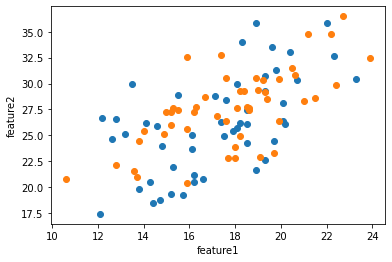

In [0]:
# 우선 전처리(표준화) 전의 데이터 분포 확인
plt.scatter(x_train[:50,1], x_train[:50,2])
plt.scatter(x_val[:50,1], x_val[:50,2])
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()  # 두번째 피쳐(최저온도), 세번째피쳐(최고온도)가 10~30 대의 숫자인것을 확인가능 

In [0]:
# 데이터 전처리(표준화)과정
# 학습, 테스트 세트의 표준화를 위해 먼저 학습세트의 평균, 표준편차를 구해야한다
train_mean = np.mean(x_train, axis=0) # 학습세트의 각피쳐의 평균
train_std = np.std(x_train, axis=0) # 학습세트의 각피쳐의 표준편차

In [0]:
print(train_mean) # 학습세트의 각피쳐의 평균
print(train_std) # 학습세트의 각피쳐의 표준편차

[21.24240343 17.53519313 26.57639485  4.20128755  0.27896996]
[ 3.1775572   2.79985547  4.31321961 11.1142235   0.44849272]


In [0]:
# 표준화를 쉽게 하기 위해 함수정의 -> 같은 비율로 전처리 하기 위해 학습세트의 평균, 표준편차를 그대로 사용한다.
def standardScaler(data):
  data_scaled = (data - train_mean) / train_std
  return data_scaled

In [0]:
# 학습세트 표준화
x_train_scaled = standardScaler(x_train) 

In [0]:
# 검증세트 표준화
x_val_scaled = standardScaler(x_val) # 학습세트와 같은 비율로 전처리하기 위해 학습세트의 평균, 표준편차를 그대로 사용한다

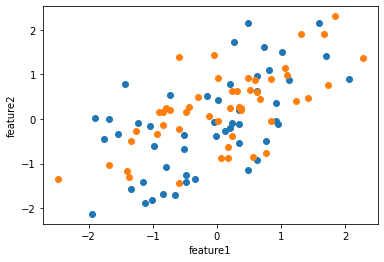

In [0]:
# 표준화된 데이터로 그래프 작성 -> 제대로 표준화 되었는지 확인
plt.scatter(x_train_scaled[:50,1], x_train_scaled[:50,2])
plt.scatter(x_val_scaled[:50,1], x_val_scaled[:50,2])
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()  # 완성된 그래프를 보면 위 그래프와 모양은 똑같지만 값의 범위가 현저히 줄어든 것을 확인 할 수 있으니 표준화가 잘된 것을 확인할 수 있습니다..

In [0]:
# 텐서플로우 그래프 그리기
num_x = 5
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , 1]), name='weight') 
b = tf.Variable(tf.random.normal([1]), name='bias')

In [0]:
hypothesis =  tf.matmul(X, W) + b

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001) 

In [0]:
train = optimizer.minimize(cost)

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [0]:
epochs = 20001
for step in range(epochs):
  cost_val, hy_val, W_all, _ = sess.run([cost, hypothesis, W, train], feed_dict={X:x_train_scaled, Y:y_train})
  cost_list.append(cost_val)
  w_history.append(W_all.copy())  

  if step % 200 == 0:
    print(step, cost_val)
  

0 644.4452
200 594.899
400 549.27014
600 507.23602
800 468.50305
1000 432.80344
1200 399.8926
1400 369.54697
1600 341.562
1800 315.7502
2000 291.93967
2200 269.97275
2400 249.70454
2600 231.0018
2800 213.74222
3000 197.8132
3200 183.11128
3400 169.54105
3600 157.01463
3800 145.45111
4000 134.77614
4200 124.92089
4400 115.82202
4600 107.42119
4800 99.664604
5000 92.50256
5200 85.88928
5400 79.78245
5600 74.14319
5800 68.93554
6000 64.12624
6200 59.68475
6400 55.58273
6600 51.794228
6800 48.295025
7000 45.062996
7200 42.077682
7400 39.320053
7600 36.77269
7800 34.41944
8000 32.245502
8200 30.237135
8400 28.381624
8600 26.667234
8800 25.08319
9000 23.619482
9200 22.26696
9400 21.017046
9600 19.86191
9800 18.794323
10000 17.807583
10200 16.89548
10400 16.052357
10600 15.272898
10800 14.552248
11000 13.885966
11200 13.269838
11400 12.700096
11600 12.173189
11800 11.685829
12000 11.234978
12200 10.817909
12400 10.432022
12600 10.074951
12800 9.744516
13000 9.438687
13200 9.155593
13400 8.893

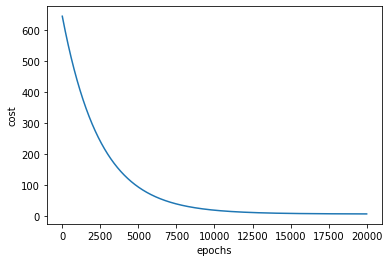

In [0]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

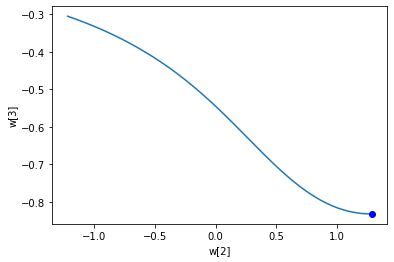

In [0]:
# 가중치 업데이트 과정 그래프
w2 = []
w3 = []
for w in  w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1],'bo')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [0]:
prediction = sess.run(hypothesis, feed_dict={X:x_val_scaled})  # 검증 세트에 대한 예측값 구하기

In [0]:
# 검증용 피쳐데이터로 예측한 값들과 검증용 레이블 데이터 세트를 비교 -> 각 샘플데이터에 대한 오차를 평균내어 평균 오차를 구해 이걸로 모델의 정확도 판단
np.mean(np.square(prediction - y_val))

# 평균적인 제곱오차

5.385583306110024

In [0]:
# 내가 정한 임의의 값으로 예측하기 -> 표준화한 데이터로 모델을 만들었기 때문에 임의의 값을 넣어줄때도 임의의 값을 표준화 해주어야 합니다.
X_test = np.array([[25,22,29,0,1]])
X_test_scaled = standardScaler(X_test)
print(X_test_scaled)

[[ 1.18254254  1.5946562   0.56190163 -0.37800999  1.6076739 ]]


In [0]:
print(sess.run(hypothesis, feed_dict={X:X_test_scaled})) 

[[31.267887]]


In [0]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[23,20,27,10.1,1],
                     [25,22,32,15,0],
                     [20.5,15,23,0,1],
                     [30,20,40,45,1],
                     [27,22,32,22,1]])
X_test_5_scaled = standardScaler(X_test_5)

In [0]:
print(sess.run(hypothesis, feed_dict={X:X_test_5_scaled}))

[[29.040846]
 [25.918411]
 [27.738266]
 [33.99577 ]
 [31.569386]]


In [0]:
try:
  x_input = input("입력(평균온도, 최저온도, 최고온도, 강수량, 주말여부): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
  print("평균온도\t최저온도\t최고온도\t강수량\t\t주말여부")
  for i in x_input_strip:
    print(i,end="\t\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = standardScaler(x_input_test)

  print("예상 맥주소비량 : ", (sess.run(hypothesis, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")

입력(평균온도, 최저온도, 최고온도, 강수량, 주말여부): 25,22,29,0,1
평균온도	최저온도	최고온도	강수량		주말여부
25.0		22.0		29.0		0.0		1.0		
예상 맥주소비량 :  [[31.267887]]


In [0]:
sess.close()